In [1]:
#visulization module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv(r'E:\Machine learning\ML assignment\student_records\student-por.csv', sep=";")

In [3]:
df.shape

(649, 33)

In [4]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [5]:
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [6]:
pd.set_option("display.max_columns", None)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


In [7]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [8]:
cat_col = [col for col in df.columns if df[col].dtypes == 'object' ]
num_col = [col for col in df.columns if df[col].dtypes != 'object' ]

In [9]:
categorical_col = df[cat_col]

In [10]:
categorical_col

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,no,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,no,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,no,no,yes,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,R,GT3,T,services,other,course,mother,no,no,no,yes,no,yes,yes,no
645,MS,F,U,LE3,T,teacher,services,course,mother,no,yes,no,no,yes,yes,yes,no
646,MS,F,U,GT3,T,other,other,course,mother,no,no,no,yes,yes,yes,no,no
647,MS,M,U,LE3,T,services,services,course,mother,no,no,no,no,no,yes,yes,no


In [11]:
categorical_col['Mjob'].unique()

array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object)

In [12]:
categorical_col['address'].unique()

array(['U', 'R'], dtype=object)

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
Lencoder = LabelEncoder()

In [15]:
categorical_col.columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [16]:
for i in categorical_col.columns:
    categorical_col[i] = Lencoder.fit_transform(categorical_col[i])

<ipython-input-16-3240aa77f1b4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_col[i] = Lencoder.fit_transform(categorical_col[i])


In [17]:
categorical_col.head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,0,0,1,0,0,0,4,0,1,1,0,0,0,1,1,0,0
1,0,0,1,0,1,0,2,0,0,0,1,0,0,0,1,1,0
2,0,0,1,1,1,0,2,2,1,1,0,0,0,1,1,1,0
3,0,0,1,0,1,1,3,1,1,0,1,0,1,1,1,1,1
4,0,0,1,0,1,2,2,1,0,0,1,0,0,1,1,0,0


In [18]:
num_col

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

In [19]:
import warnings; 
warnings.simplefilter('ignore')

In [20]:
#dealing with outliers
def plot(df,col):
    fig,(ax1,ax2)= plt.subplots(2,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2) 

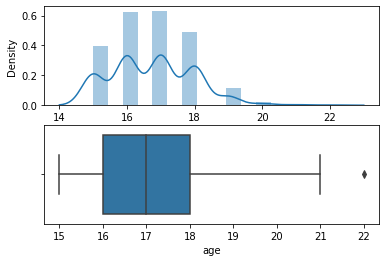

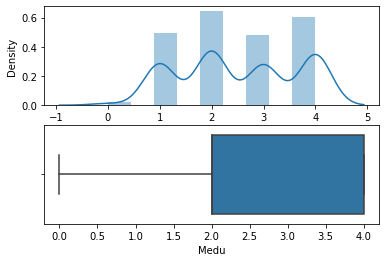

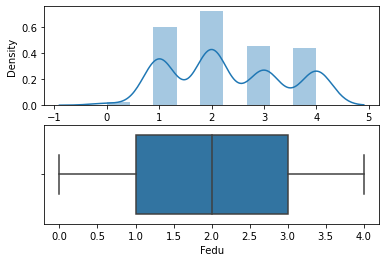

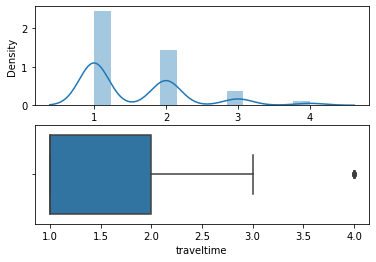

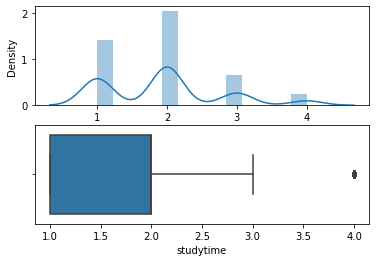

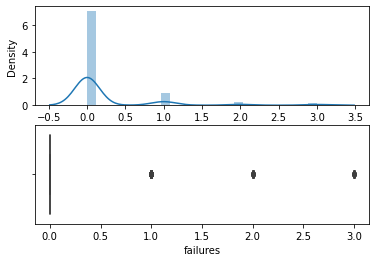

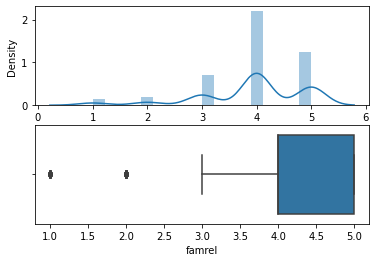

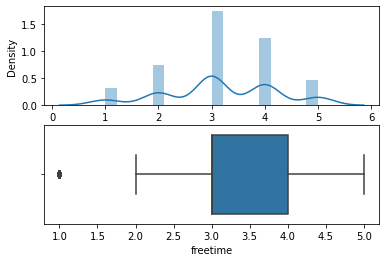

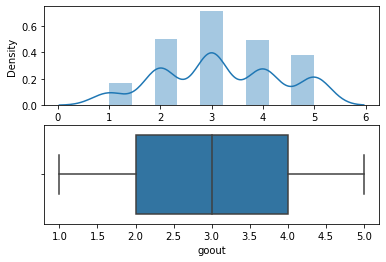

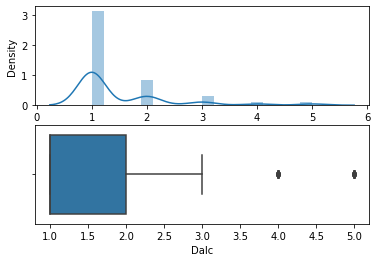

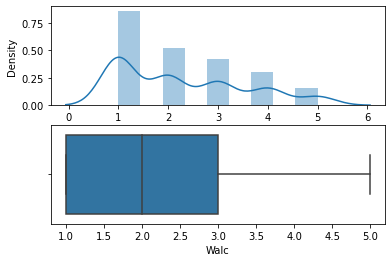

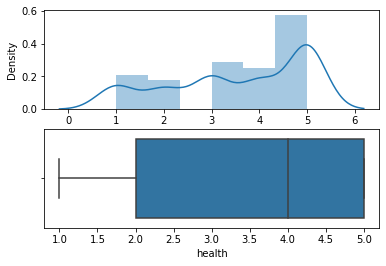

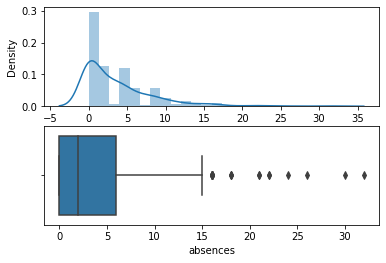

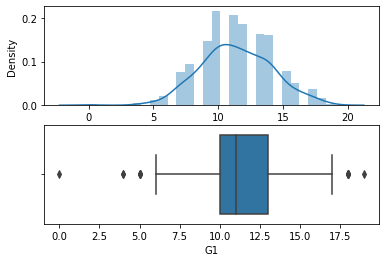

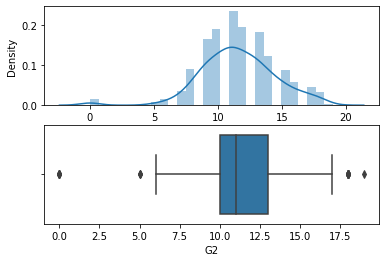

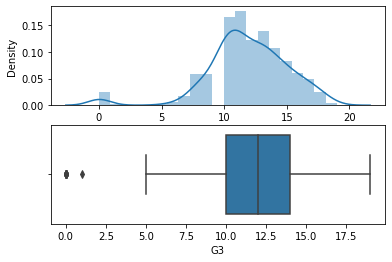

In [21]:
for i in num_col:
    plot(df,i)

In [22]:
data_train = pd.concat([categorical_col,df[num_col]],axis=1)

In [23]:
data_train

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,1,0,0,0,4,0,1,1,0,0,0,1,1,0,0,18,4,4,2,2,0,4,3,4,1,1,3,4,0,11,11
1,0,0,1,0,1,0,2,0,0,0,1,0,0,0,1,1,0,17,1,1,1,2,0,5,3,3,1,1,3,2,9,11,11
2,0,0,1,1,1,0,2,2,1,1,0,0,0,1,1,1,0,15,1,1,1,2,0,4,3,2,2,3,3,6,12,13,12
3,0,0,1,0,1,1,3,1,1,0,1,0,1,1,1,1,1,15,4,2,1,3,0,3,2,2,1,1,5,0,14,14,14
4,0,0,1,0,1,2,2,1,0,0,1,0,0,1,1,0,0,16,3,3,1,2,0,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,0,0,1,3,2,0,1,0,0,0,1,0,1,1,0,19,2,3,1,3,1,5,4,2,1,2,5,4,10,11,10
645,1,0,1,1,1,4,3,0,1,0,1,0,0,1,1,1,0,18,3,1,1,2,0,4,3,4,1,1,1,4,15,15,16
646,1,0,1,0,1,2,2,0,1,0,0,0,1,1,1,0,0,18,1,1,2,2,0,1,1,1,1,1,5,6,11,12,9
647,1,1,1,1,1,3,3,0,1,0,0,0,0,0,1,1,0,17,3,1,2,1,0,2,4,5,3,4,2,6,10,10,10


In [24]:
#sperating the dependaple quantity and undependent quantity.
x = data_train.drop('G3',axis=1)
y = data_train['G3']

In [25]:
# we will use best feature selection using infromation gain
from sklearn.feature_selection import mutual_info_classif

In [26]:
mutual_info_classif(x,y)

array([0.05628569, 0.        , 0.01699738, 0.        , 0.0131073 ,
       0.04081293, 0.04763875, 0.02032046, 0.08073213, 0.        ,
       0.02399295, 0.        , 0.        , 0.01338976, 0.09292699,
       0.05493994, 0.00815996, 0.0281272 , 0.0433048 , 0.0344865 ,
       0.00885758, 0.04160286, 0.11422641, 0.03222578, 0.02992758,
       0.03984349, 0.02183993, 0.        , 0.04812346, 0.01517216,
       0.8048518 , 1.19609826])

In [27]:
data_frame = pd.DataFrame(mutual_info_classif(x,y),index=x.columns)

In [28]:
data_frame

,0
school,0.047474
sex,0.003878
address,0.040552
famsize,0.000000
Pstatus,0.000000
Mjob,0.015888
Fjob,0.013838
reason,0.023284
guardian,0.000000
schoolsup,0.005881


In [29]:
data_frame.columns = ['Importance']
data_frame.sort_values(by='Importance',ascending=False)

,Importance
G2,1.228154
G1,0.776068
failures,0.128962
higher,0.088171
age,0.063555
traveltime,0.061873
Medu,0.059538
Fedu,0.058844
internet,0.056438
school,0.047474


In [30]:
def drop_col(col):
    x.drop(col,axis=1,inplace=True)

In [31]:
for i in ['health','schoolsup','absences','Walc','reason','nursery','romantic']:
    drop_col(i)

In [32]:
x

,school,sex,address,famsize,Pstatus,Mjob,Fjob,guardian,famsup,paid,activities,higher,internet,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,G1,G2
0,0,0,1,0,0,0,4,1,0,0,0,1,0,18,4,4,2,2,0,4,3,4,1,0,11
1,0,0,1,0,1,0,2,0,1,0,0,1,1,17,1,1,1,2,0,5,3,3,1,9,11
2,0,0,1,1,1,0,2,1,0,0,0,1,1,15,1,1,1,2,0,4,3,2,2,12,13
3,0,0,1,0,1,1,3,1,1,0,1,1,1,15,4,2,1,3,0,3,2,2,1,14,14
4,0,0,1,0,1,2,2,0,1,0,0,1,0,16,3,3,1,2,0,4,3,2,1,11,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,0,0,1,3,2,1,0,0,1,1,1,19,2,3,1,3,1,5,4,2,1,10,11
645,1,0,1,1,1,4,3,1,1,0,0,1,1,18,3,1,1,2,0,4,3,4,1,15,15
646,1,0,1,0,1,2,2,1,0,0,1,1,0,18,1,1,2,2,0,1,1,1,1,11,12
647,1,1,1,1,1,3,3,1,0,0,0,1,1,17,3,1,2,1,0,2,4,5,3,10,10


In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [35]:
from sklearn import metrics
import pickle

In [36]:
def predict(ml_model,dump):
    model = ml_model.fit(X_train,y_train)
    print('Training Score = {}'.format(model.score(X_train,y_train)))
    y_pred = model.predict(X_test)
    print('predictions are\n {}'.format(y_pred))
    print('\n')
    
    r2_score = metrics.r2_score(y_test,y_pred)
    print('r2 score is {}'.format(r2_score))
    
    print('MAE: ',metrics.mean_absolute_error(y_test,y_pred))
    print('MSE: ',metrics.mean_squared_error(y_test,y_pred))
    print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
    
    sns.distplot(y_test-y_pred)
    
    if dump == 1:
        file = open(r'E:\Machine learning\ML assignment\flight ticket price prediction\model.pkl','wb')
        pickle.dump(model,file)

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

Training Score = 0.8588893595495914
predictions are
 [17.  11.  17.  11.4 12.4 16.4 16.8  9.  10.2 11.  17.4 12.  12.8 10.2
 11.4 13.2 11.6  8.6 15.6 14.4 15.4 13.8 14.8 12.6 15.8 12.   9.4 10.6
 11.  15.2 16.6 13.2  7.   7.6 17.2 15.4 14.2 14.  14.4 11.6 13.8 11.
  8.6 12.  13.4 13.4 17.6 11.6 12.8 11.4 11.  11.2 13.4 10.  11.  17.2
 10.  11.  11.  11.4  9.4 11.6 15.6 12.6 15.2 16.6  9.8  7.8  9.8 10.
 14.6 15.8 12.6 16.8 12.8 12.8 12.2 14.8 12.6 13.2 10.8 12.2 16.   7.2
 11.6 17.4 12.   9.8 15.  12.8 15.6  9.8 12.2 17.6 11.4 14.6 15.  10.
 12.2 11.  11.4 10.8 11.4 12.8 12.  11.2 10.4 11.8 10.4 13.6 14.2  6.6
 12.6 10.6  6.2 10.8 11.4 16.2 16.   9.  13.   1.6 15.8 14.  11.4  6.2
 17.2 10.8 13.4  8.8 17.6  8.8 12.4 13.4 10.6 11.4  9.2  9.6  3.  12.2
 11.2 12.  12.2 10.2 10.   8.6 13.  13.2 15.2 12.8 15.8  9.8  8.8 15.
 13.   9.6 12.8 16.6  8.6 13.8 13.4 15.6 10.2 11.8 10.4 14.6 14.4  9.
  3.2 11.8 11.4 12.8 14.6 14.4  6.2 12.4 17.2 10.6  6.4 12.6 15.8 16.
 16.  13.4 11.2 13.2 15.8  8.8

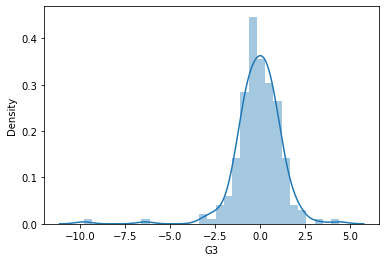

In [38]:
predict(KNeighborsRegressor(),0)

Training Score = 0.8427661984275592
predictions are
 [18.07562633 11.68123861 18.47815833 10.59275686 12.09099632 16.10445994
 17.37940731  9.50007187 10.94410172 10.48794371 18.47932188 12.50361145
 12.37516568  9.54960692 11.49440895 13.54562511 11.73689233  7.53593967
 15.42389714 15.154543   15.52249359 14.07552668 14.38701692 12.55932117
 15.22821086 12.97301772  8.38843248 11.05727664 11.0887962  15.57500847
 16.26357281 13.33996447  7.89532206  6.5127523  18.27152904 15.49404254
 13.71158685 15.592187   13.11341887 11.14632887 13.2263464  10.52106722
  8.4371771  11.38003348 13.52981229 13.39349971 17.90090201 10.98545648
 12.15375377 11.87609022 10.73476095 11.27797794 14.20429818  9.83371695
 10.34152167 17.88716945  9.08688301 11.14583114 11.63264213 10.49306312
  9.09876126 11.50368709 16.21001421 12.26689485 15.60332996 15.97933243
  9.71914943  8.09609119 10.12413645  9.59878744 15.92432592 15.33622076
 12.28187355 16.59315989 13.61497712 13.45914119 12.5557984  15.6358358

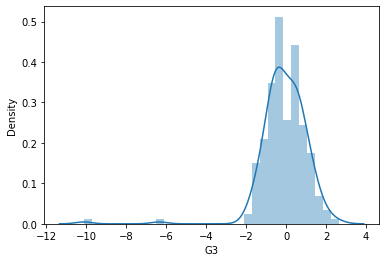

In [39]:
predict(LinearRegression(),0)

Training Score = 0.972680473109966
predictions are
 [17.51 11.01 17.18 11.   11.17 16.48 17.22 10.22 10.4  10.56 17.42 12.69
 13.03 10.11 11.06 13.27 11.64  7.16 15.53 14.9  15.31 13.54 13.44 12.56
 15.53 13.4   8.39 11.11 11.1  15.82 16.39 13.07  6.92  6.8  17.26 15.66
 14.52 14.56 13.14 10.83 13.25 10.44  5.8  11.2  13.18 12.28 17.77 11.74
 12.58 11.33 11.33 11.04 14.94  9.88 11.56 17.71  9.61 11.21 10.79 10.41
  8.63 11.04 16.7  12.67 15.49 16.01  9.81  9.21 10.11 10.04 15.58 15.32
 12.48 16.49 13.19 13.15 13.01 15.34 12.43 13.02 10.79 11.32 16.68  6.49
 13.1  17.87 11.    3.39 15.12 13.44 15.59  8.94 10.98 17.56 10.1  15.46
 15.67  9.57 12.67  9.97 12.63 10.51 11.22 11.22 12.68 10.48 11.22 11.03
  9.92 13.19 13.07  8.35 11.06 11.39  5.07  8.13 10.44 16.7  15.46  7.47
 13.34  1.13 15.39 13.31 12.68  7.38 17.79  9.96 12.91  7.97 17.39 11.62
 12.03 13.11 11.26  9.66 10.9   9.81  2.26 12.69 10.32 13.84 12.89 10.2
  9.63  9.32 13.13 13.79 16.62 12.67 16.69 10.17  7.9  15.56 13.26 10.13


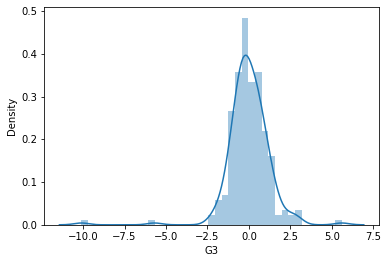

In [40]:
predict(RandomForestRegressor(),0)

In [41]:
#cross validitation
##1 randomiseCV and grid search
###hypertunning
from sklearn.model_selection import RandomizedSearchCV

In [42]:
n_estimator = [int(x) for x in np.linspace(start=100, stop=1200, num=6)]
max_depth = [int(x) for x in np.linspace(start=5, stop=30, num=4)]

In [43]:
Random_grid = {
    'n_estimators': n_estimator,
    'max_features':['auto','sqrt'],
    'max_depth': max_depth,
    'min_samples_split':[5,10,15,100]
}

In [44]:
rad_forest = RandomForestRegressor()

In [45]:
rf_random = RandomizedSearchCV(estimator=rad_forest, param_distributions=Random_grid, cv=3, verbose=2, n_jobs=-1)
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [46]:
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'max_features': 'auto',
 'max_depth': 5}

In [47]:
predict = rf_random.predict(X_test)

<AxesSubplot:xlabel='G3', ylabel='Density'>

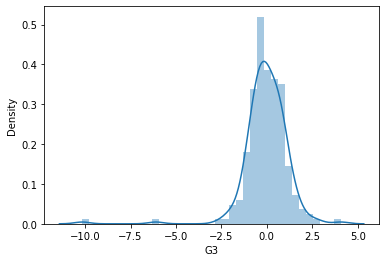

In [48]:
sns.distplot(y_test-predict)

In [49]:
metrics.r2_score(y_test,predict)

0.8586782618797226

In [50]:
from xgboost import XGBClassifier

In [51]:
classifier = XGBClassifier()